## Logistic Regression from Scratch

Loading necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [3]:
filename = 'ex2data1.txt'
#data = np.loadtxt(filename, delimiter = ',')
#data.head()
data = pd.read_csv(filename, names = ['x1','x2','y'], header = None)
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Seperating Target from other features

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
print("Number of examples with zero:", sum(y == 0))
print("Number of examples with 1:", sum(y == 1))

Number of examples with zero: 40
Number of examples with 1: 60


60 students passes overall while 40 students do not pass 

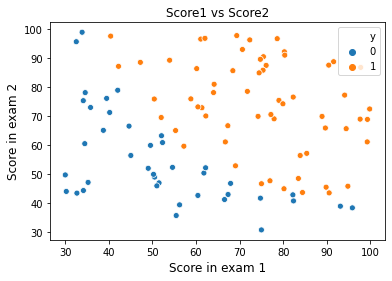

In [6]:
sns.scatterplot(X["x1"], X["x2"], hue = y)
plt.title("Score1 vs Score2")
plt.xlabel("Score in exam 1", fontsize = 12)
plt.ylabel("Score in exam 2", fontsize = 12)
plt.show()

Function to normalize Features

In [7]:
def Normalize(X):
    mu = X.mean()
    sigma = X.std()
    X = (X - mu)/sigma
    return X

In [8]:
# Sigmoid Function ---> Gives output between 0 and 1 only
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

Function to calculate loss values

In [9]:
def costfunction(X, y, theta):
    m = len(y)
    sigma = sigmoid(X@theta)
    cost = (-1/m)*np.sum(y*np.log(sigma) + (1-y)*np.log(1-sigma))
    return cost

Function to converge weights to minimize the loss. It takes number of iterations and learning rate(alpha) as hyperparameters.

In [10]:
def gradientDescent(X, y, theta, alpha = 0.09, iterations = 400):
    m = len(y)
    J_history = []
    for i in range(iterations):
        sigma = sigmoid(X@theta)
        theta = theta - (alpha/m)*(X.T@(sigma - y))
        J_history.append(costfunction(X, y, theta))
    return theta, J_history

In [12]:
m = len(y)
X_normalized = Normalize(X)
X_new = np.c_[np.ones((m,1)), X_normalized] # Adding 1 to each row to calculate bias term
theta = np.array([0,0,0]) # initializing weights
print(theta.shape)
X_new.shape

(3,)


(100, 3)

In [132]:
#cost Function calculated at theta = [0,0,0]
print("Cost at theta = 0,0,0")
costfunction(X_new, y, theta)

Cost at theta = 0,0,0


0.6931471805599453

In [160]:
theta, J_history = gradientDescent(X_new, y ,theta)
print("Values of theta", theta)
print("Final value of cost:", J_history[-1])

Values of theta [0.87743815 2.23314467 2.03160888]
Final value of cost: 0.2353437445657395


plotting loss vs number of iterations to check that loss is decreasing as number of iterations increases

Text(0, 0.5, 'Loss')

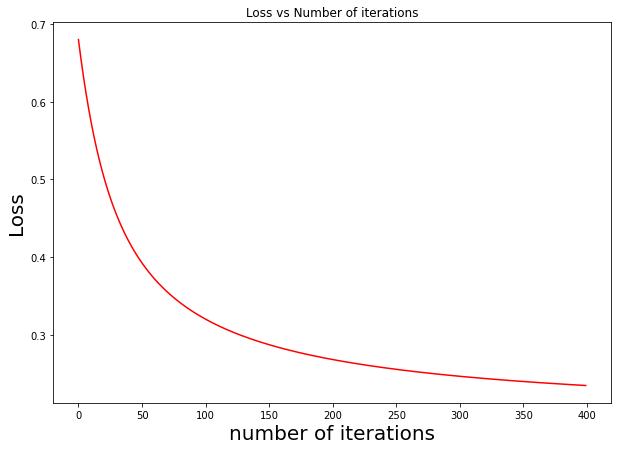

In [158]:
iterations = len(J_history)
plt.figure(figsize = (10,7))
plt.plot([i for i in range(iterations)], J_history,'r-')
plt.title("Loss vs Number of iterations")
plt.xlabel("number of iterations",fontsize=20)
plt.ylabel("Loss",fontsize = 20)

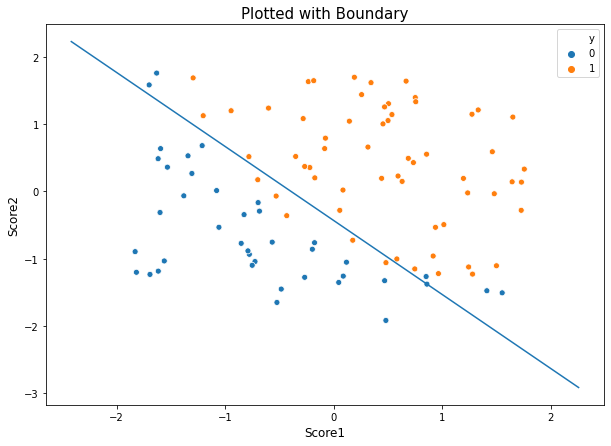

In [161]:
plt.figure(figsize = (10,7))
plot_x = np.array([min(X_normalized.iloc[:,1])-0.5, max(X_normalized.iloc[:,1]) +0.5])
line = (-1./theta[-1])*(theta[1]*plot_x + theta[0]);
sns.scatterplot(X_normalized["x1"],X_normalized["x2"], hue = y)
plt.plot(plot_x, line)
plt.title("Plotted with Boundary", fontsize = 15)
plt.xlabel("Score1", fontsize = 12)
plt.ylabel("Score2", fontsize = 12)
plt.show()

Above we have plotted Decision boundary for normalized values of X, This boundary will be same for unnormalized X

To predict if student passes or not using the weights obtained above

In [136]:
def predict(X, theta):
    sigma = sigmoid(X@theta)
    p = (sigma >= 0.5)
    return p

In [150]:
p = predict(X_new, theta)
tp = sum((y == 1) & (p == True))
tn = sum((y == 0) & (p == False))
accuracy = (tp + tn)/m
print("Accuracy achieved:",accuracy)

Accuracy achieved: 0.9


We have predicted correct result 90% of times.